#### import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#### load dataset

In [3]:
data = pd.read_csv(r"F:\ICTAK\data sets\car_age_price.csv")

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


#### dataset summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
# shape of the dataset
data.shape

(112, 2)

#### checking for null values

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

#### relationship between Year and Price

<AxesSubplot:>

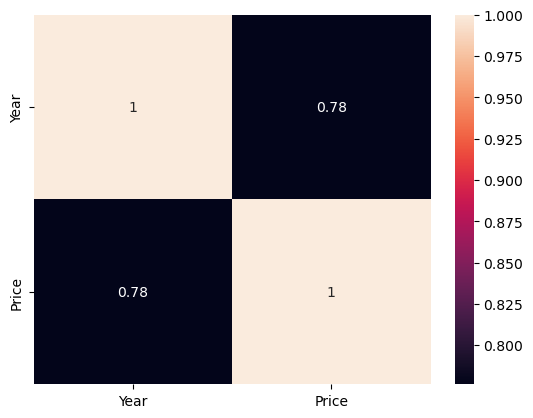

In [8]:
corrmatrix = data.corr()
sns.heatmap(corrmatrix, annot=True)

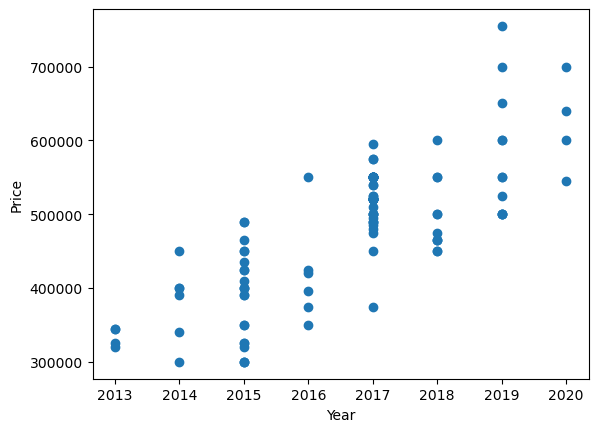

In [9]:
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### data preprocessing and model creation

In [11]:
#Splitting data into feature and target
y = data['Price']
x = data.drop('Price', axis=1)

In [12]:
from sklearn import preprocessing

In [13]:
x = preprocessing.scale(x)
y = preprocessing.scale(y)

In [15]:
# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [16]:
lr = LinearRegression()
lasso = Lasso(alpha=0.1)

In [17]:
model_lr = lr.fit(x_train, y_train)

In [19]:
model_lasso = lasso.fit(x_train, y_train)

In [20]:
y_pred_lr = model_lr.predict(x_test)

In [21]:
y_pred_lasso = model_lasso.predict(x_test)

In [22]:
y_pred_lr

array([ 0.14988079,  1.07069263, -1.23133697, -0.77093105, -0.77093105,
        0.14988079,  1.53109855, -1.23133697,  0.14988079,  0.61028671,
        0.14988079,  0.14988079,  1.07069263, -0.31052513, -1.23133697,
       -1.69174289,  1.53109855,  0.14988079,  0.14988079,  0.61028671,
        0.14988079,  0.14988079, -0.77093105,  0.14988079,  0.14988079,
        0.14988079, -0.77093105, -0.31052513])

In [23]:
y_pred_lasso

array([ 0.12979032,  0.92078679, -1.05670439, -0.66120615, -0.66120615,
        0.12979032,  1.31628503, -1.05670439,  0.12979032,  0.52528855,
        0.12979032,  0.12979032,  0.92078679, -0.26570792, -1.05670439,
       -1.45220263,  1.31628503,  0.12979032,  0.12979032,  0.52528855,
        0.12979032,  0.12979032, -0.66120615,  0.12979032,  0.12979032,
        0.12979032, -0.66120615, -0.26570792])

#### Evaluating models

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Linear Regression
print("MSE is :",mean_squared_error(y_test, y_pred_lr))
print("R Squared value is :",r2_score(y_test, y_pred_lr))

MSE is : 0.38527547183439875
R Squared value is : 0.6795487066235788


In [27]:
# Lasso Regression
print("MSE is :",mean_squared_error(y_test, y_pred_lasso))
print("R Squared value is :",r2_score(y_test, y_pred_lasso))

MSE is : 0.42276725102201057
R Squared value is : 0.6483650730679564
